In [2]:
from datasets import load_dataset

# Load dataset
dataset = load_dataset("MattNandavong/swin-text-classification-dataset")

print(dataset)
print(dataset['train'][0])   # look at first row


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sample_dataset.json:   0%|          | 0.00/639 [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['topic', 'query'],
        num_rows: 6
    })
})
{'topic': 'Applying and Enrolling', 'query': 'How can I apply for a job?'}


In [3]:
# Extract queries and topics
texts = [x['query'] for x in dataset['train']]
labels = [x['topic'] for x in dataset['train']]

print("Texts:", texts)
print("Labels:", labels)


Texts: ['How can I apply for a job?', 'What are the top skills needed for customer service?', 'How do I reset my password?', 'What courses are available for enrollment?', 'How do I contact customer support?', 'What are the requirements for admission?']
Labels: ['Applying and Enrolling', 'Customer Service Skills', 'Account Management', 'Applying and Enrolling', 'Customer Support', 'Admissions']


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

print("Encoded labels:", y)
print("Classes:", label_encoder.classes_)


Encoded labels: [2 3 0 2 4 1]
Classes: ['Account Management' 'Admissions' 'Applying and Enrolling'
 'Customer Service Skills' 'Customer Support']


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(texts)

print("Shape of features:", X.shape)


Shape of features: (6, 15)


In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

y_pred = clf.predict(X)


Accuracy: 1.0

Classification Report:
                          precision    recall  f1-score   support

     Account Management       1.00      1.00      1.00         1
             Admissions       1.00      1.00      1.00         1
 Applying and Enrolling       1.00      1.00      1.00         2
Customer Service Skills       1.00      1.00      1.00         1
       Customer Support       1.00      1.00      1.00         1

               accuracy                           1.00         6
              macro avg       1.00      1.00      1.00         6
           weighted avg       1.00      1.00      1.00         6



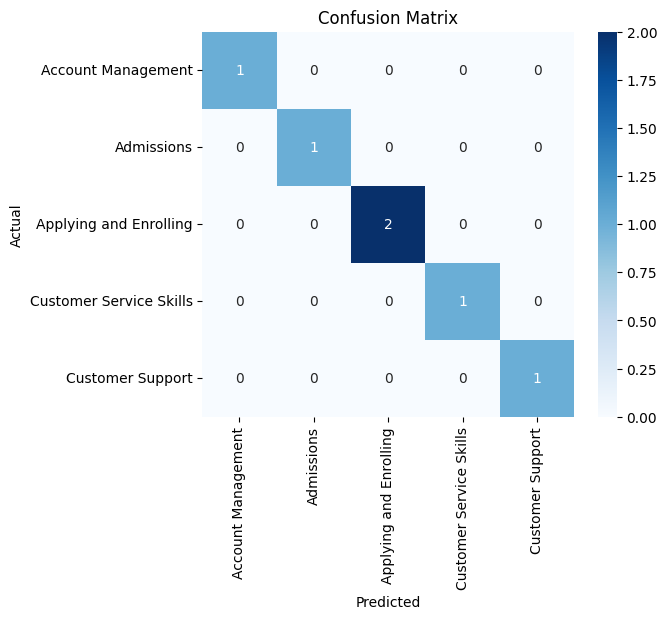

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [8]:
sample_queries = [
    "How do I register for a course?",
    "What are key skills for working with customers?"
]

sample_features = vectorizer.transform(sample_queries)
sample_preds = clf.predict(sample_features)

for q, pred in zip(sample_queries, sample_preds):
    print(f"Query: {q} --> Predicted Topic: {label_encoder.inverse_transform([pred])[0]}")


Query: How do I register for a course? --> Predicted Topic: Applying and Enrolling
Query: What are key skills for working with customers? --> Predicted Topic: Applying and Enrolling
